In [1]:
deps_path = '/kaggle/input/czii-cryoet-dependencies'

In [2]:
! cp -r /kaggle/input/czii-cryoet-dependencies/asciitree-0.3.3/ asciitree-0.3.3/

In [3]:
! pip wheel asciitree-0.3.3/asciitree-0.3.3/
! cp /kaggle/input/best-weights-code/* ./ -r
! cp /kaggle/input/best-weights ./ -r
! cp /kaggle/input/voxhrnet-v2/voxhrnetV2.py ./ -r
! cp /kaggle/input/load-vox-net/load_model.py ./ -r

Processing ./asciitree-0.3.3/asciitree-0.3.3
  Preparing metadata (setup.py) ... - done
  Created wheel for asciitree: filename=asciitree-0.3.3-py3-none-any.whl size=5034 sha256=a7b0fe65d148b775dee493b856b531f714b3eb8b25b87a152d8238a42d142146
  Stored in directory: /root/.cache/pip/wheels/77/df/a8/c6318c87827b53ea48635bf95b1249186d3d21f041176e062e
Successfully built asciitree


In [4]:
!pip install /kaggle/input/tensorrt-10-1-0/nvidia_cuda_runtime_cu12-12.2.140-py3-none-manylinux1_x86_64.whl
!pip install /kaggle/input/tensorrt-10-1-0/tensorrt_cu12_bindings-10.1.0-cp310-none-manylinux_2_17_x86_64.whl
!pip install /kaggle/input/tensorrt-10-1-0/tensorrt_cu12_libs-10.1.0-py2.py3-none-manylinux_2_17_x86_64.whl
!pip install /kaggle/input/tensorrt-10-1-0/tensorrt_cu12-10.1.0-py2.py3-none-any.whl
!pip install /kaggle/input/tensorrt-10-1-0/tensorrt-10.1.0-py2.py3-none-any.whl
!pip install /kaggle/input/tensorrt-10-1-0/polygraphy-0.49.14-py2.py3-none-any.whl
!cp -r /kaggle/input/tensorrt-10-1-0/torch2trt-master /kaggle/working/torch2trt
!pip install /kaggle/working/torch2trt

Processing /kaggle/input/tensorrt-10-1-0/nvidia_cuda_runtime_cu12-12.2.140-py3-none-manylinux1_x86_64.whl
Processing /kaggle/input/tensorrt-10-1-0/tensorrt_cu12_bindings-10.1.0-cp310-none-manylinux_2_17_x86_64.whl
Processing /kaggle/input/tensorrt-10-1-0/tensorrt_cu12_libs-10.1.0-py2.py3-none-manylinux_2_17_x86_64.whl
Processing /kaggle/input/tensorrt-10-1-0/tensorrt_cu12-10.1.0-py2.py3-none-any.whl
Processing /kaggle/input/tensorrt-10-1-0/tensorrt-10.1.0-py2.py3-none-any.whl
Processing /kaggle/input/tensorrt-10-1-0/polygraphy-0.49.14-py2.py3-none-any.whl
Processing ./torch2trt
  Preparing metadata (setup.py) ... - done
  Created wheel for torch2trt: filename=torch2trt-0.5.0-py3-none-any.whl size=53584 sha256=cc0af268931ea55e15959dc0547e4a1362d8e658341aa14f54fb3d657483f35c
  Stored in directory: /tmp/pip-ephem-wheel-cache-gqegt4yv/wheels/aa/13/b6/9c4fc920c86433a17d0e9633c5893ca6c7b3927833c4b5a067
Successfully built torch2trt


In [5]:
! cp /kaggle/input/d/luoziqian/unet2e3d-6c/* ./
! cp /kaggle/input/voxhrnet/voxhrnet.py ./ -r
! cp /kaggle/input/vox-networks-dataset/voxhrnet.py ./
! cp /kaggle/input/vox-networks-dataset/config_small.yaml ./
! cp /kaggle/input/vox-networks-dataset/model10.py ./

In [6]:
!pip install asciitree-0.3.3-py3-none-any.whl
! pip install /kaggle/input/einops-0-8-none-any/einops-0.8.0-py3-none-any.whl

Processing ./asciitree-0.3.3-py3-none-any.whl
Processing /kaggle/input/einops-0-8-none-any/einops-0.8.0-py3-none-any.whl


In [7]:
! pip install -q --no-index --find-links {deps_path} --requirement {deps_path}/requirements.txt

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cesium 0.12.3 requires numpy<3.0,>=2.0, but you have numpy 1.26.4 which is incompatible.
dask-expr 1.1.15 requires dask==2024.9.1, but you have dask 2024.11.0 which is incompatible.
kfp 2.5.0 requires google-cloud-storage<3,>=2.2.1, but you have google-cloud-storage 1.44.0 which is incompatible.
kfp 2.5.0 requires requests-toolbelt<1,>=0.8.0, but you have requests-toolbelt 1.0.0 which is incompatible.
rapids-dask-dependency 24.8.0a0 requires dask==2024.7.1, but you have dask 2024.11.0 which is incompatible.
rapids-dask-dependency 24.8.0a0 requires distributed==2024.7.1, but you have distributed 2024.11.0 which is incompatible.


In [8]:
! pip install /kaggle/input/vox-networks-dataset/yacs-0.1.8-py3-none-any.whl

Processing /kaggle/input/vox-networks-dataset/yacs-0.1.8-py3-none-any.whl


In [9]:
from typing import List, Tuple, Union
import numpy as np
import torch
from monai.data import DataLoader, Dataset, CacheDataset, decollate_batch
from monai.transforms import (
    Compose, 
    EnsureChannelFirstd, 
    Orientationd,  
    AsDiscrete,  
    RandFlipd, 
    RandRotate90d, 
    NormalizeIntensityd,
    RandCropByLabelClassesd,
)

In [10]:
import os
import shutil
import tempfile
from tqdm import tqdm
import matplotlib.pyplot as plt
%matplotlib inline

from monai.transforms import (
    Compose,
    Orientationd,
    RandFlipd,
    RandShiftIntensityd,
    RandRotate90d,
)
from monai.data import (
    ThreadDataLoader,
    CacheDataset,
    load_decathlon_datalist,
    decollate_batch,
    set_track_meta,
)
from monai.inferers import sliding_window_inference
from monai.networks.nets import SwinUNETR
from monai.metrics import DiceMetric
from monai.losses import DiceCELoss
import torch
import einops
import warnings


warnings.filterwarnings("ignore")
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

## Define some helper functions


### Patching helper functions

These are mostly used to split large volumes into smaller ones and stitch them back together. 

In [11]:
def calculate_patch_starts_with_overlap(
    dimension_size: int, patch_size: int, overlap: int
) -> List[int]:
    if dimension_size <= patch_size:
        return [0]

    num_patches = np.ceil(
        (dimension_size - overlap) / (patch_size - overlap) + 1
    ).astype(int)
    patch_starts = []
    for i in range(num_patches):
        pos = int(i * (patch_size - overlap))
        if pos + patch_size > dimension_size:
            pos = dimension_size - patch_size
        if pos not in patch_starts:
            patch_starts.append(pos)
    return patch_starts


def extract_3d_patches_overlap(
    arrays: List[np.ndarray],
    patch_sizes: Tuple[int, int, int],
    overlap_sizes: Tuple[int, int, int],
) -> Tuple[List[np.ndarray], List[Tuple[int, int, int]]]:

    patch_starts_x = calculate_patch_starts_with_overlap(
        arrays[0].shape[0], patch_sizes[0], overlap_sizes[0]
    )
    patch_starts_y = calculate_patch_starts_with_overlap(
        arrays[0].shape[1], patch_sizes[1], overlap_sizes[1]
    )
    patch_starts_z = calculate_patch_starts_with_overlap(
        arrays[0].shape[2], patch_sizes[2], overlap_sizes[2]
    )
    patch_size_d, patch_size_h, patch_size_w = patch_sizes
    patches = []
    coordinates = []
    for arr in arrays:
        for x in patch_starts_x:
            for y in patch_starts_y:
                for z in patch_starts_z:
                    patch = arr[
                        x : x + patch_size_d, y : y + patch_size_h, z : z + patch_size_w
                    ]
                    patches.append(patch)
                    coordinates.append((x, y, z))

    return patches, coordinates

## Reading in the data

In [12]:
TRAIN_DATA_DIR = "/kaggle/input/create-numpy-dataset-exp-name"
TEST_DATA_DIR = "/kaggle/input/czii-cryo-et-object-identification"

## Initialize the model

This model is pretty much directly copied from [3D U-Net PyTorch Lightning distributed training](https://www.kaggle.com/code/zhuowenzhao11/3d-u-net-pytorch-lightning-distributed-training)

In [13]:
from torch.nn.modules import Module
from torch import nn

In [14]:
!cp -r /kaggle/input/unet2d3e/* ./

In [15]:
import lightning.pytorch as pl

from monai.networks.nets import UNet
from monai.losses import TverskyLoss
from monai.metrics import DiceMetric

# use warmup lr scheduler
from torch.optim.lr_scheduler import (
    CosineAnnealingLR,
    CosineAnnealingWarmRestarts,
    StepLR,
)
import lightning.pytorch as pl

from monai.networks.nets import UNet, AttentionUnet
from monai.losses import TverskyLoss
from monai.metrics import DiceMetric

# use warmup lr scheduler
from torch.optim.lr_scheduler import (
    CosineAnnealingLR,
    CosineAnnealingWarmRestarts,
    StepLR,
)

In [16]:
config_v2 = {
    "MODEL": {
        "NAME": "voxhrnet",
        "EXTRA": {
            "STAGE2": {
                "NUM_MODULES": 1,
                "NUM_BRANCHES": 2,
                "BLOCK": "BASIC",
                "NUM_BLOCKS": [3, 3],
                "NUM_CHANNELS": [16, 32],
            },
            "STAGE3": {
                "NUM_MODULES": 1,
                "NUM_BRANCHES": 3,
                "BLOCK": "BASIC",
                "NUM_BLOCKS": [3, 3, 3],
                "NUM_CHANNELS": [16, 32, 64],
            },
        },
    }
}

In [17]:
# from monai.networks.nets import UNet,SegResNet,DynUNet
# from custom_vnet import CustomVNet
# from model2_6c import Net
# # from voxhrnet import build_model
# from voxhrnetV2 import build_model as build_model_v2
# from load_model import build_model as build_model_v3

# basic_unet = UNet(
#     spatial_dims=3,
#     in_channels=1,
#     out_channels=7,
#     channels=(48, 64, 80, 80),
#     strides=(2, 2, 1),
#     num_res_units=1,
# )
# basic_unet_1 = UNet(
#     spatial_dims=3,
#     in_channels=1,
#     out_channels=7,
#     channels=(48, 64, 80, 80),
#     strides=(2, 2, 1),
#     num_res_units=2,
# )
# basic_unet_6c = UNet(
#     spatial_dims=3,
#     in_channels=1,
#     out_channels=6,
#     channels=(48, 64, 80, 80),
#     strides=(2, 2, 1),
#     num_res_units=1,
# )

# segresnet_6c_v1 = SegResNet(
#     in_channels=1,
#     out_channels=6,
#     dropout_prob=0.1,
#     upsample_mode="deconv",
# )

# basic_unet2e3d = Net(
#     out_channels=6,
#     arch="resnet18d",
#     decoder_dim=[80, 80, 64, 32, 16],
#     pretrained=False,
# )

# basic_dynunet_v1 = DynUNet(
#     spatial_dims=3,
#     in_channels=1,
#     out_channels=6,
#     kernel_size=(3, 3, 3, 3),
#     strides=((1, 1, 1), 2, 2, 1),
#     upsample_kernel_size=(2, 2, 1),
#     filters=[16, 24, 48, 80, 80],
#     norm_name="instance",
#     act_name="PRELU",
#     deep_supervision=True,
# )

# basic_dynunet_v1 = DynUNet(
#     spatial_dims=3,
#     in_channels=1,
#     out_channels=6,
#     kernel_size=(3, 3, 3, 3),
#     strides=((1, 1, 1), 2, 2, 1),
#     upsample_kernel_size=(2, 2, 1),
#     filters=[16, 24, 48, 80, 80],
#     norm_name="instance",
#     act_name="PRELU",
#     deep_supervision=True,
# )

# basic_dynunet_v2 = DynUNet(
#     spatial_dims=3,
#     in_channels=1,
#     out_channels=6,
#     kernel_size=(3, 3, 3, 3, 3),
#     strides=((1, 1, 1), 2, 2, 2, 1),
#     upsample_kernel_size=(2, 2, 2, 1),
#     filters=[16, 24, 48, 80, 80],
#     norm_name="instance",
#     act_name="PRELU",
#     deep_supervision=True,
# )

# # basic_voxhrnet_v0 = build_model(1,6)
# basic_voxhrnet_v2 = build_model_v2(1,6,config_v2)
# basic_voxhrnet_v3 = build_model_v3()

# basic_dense_vnet = CustomVNet(in_channels=1, classes=7)

In [18]:
import os

best_weights_dir = "best-weights"
os.listdir(best_weights_dir)
best_weights_path_list = [
 'best-weights/epoch122-step2952-valid_loss0.3625-val_metric0.8367.ckpt',
 'best-weights/epoch148-step3576-valid_loss1.1154-val_metric0.7722.ckpt',
 'best-weights/epoch153-step3696-valid_loss0.3021-val_metric0.8900.ckpt',
 'best-weights/epoch194-step4680-valid_loss1.0213-val_metric0.8788.ckpt',
 'best-weights/epoch152-step3672-valid_loss0.4333-val_metric0.7929.ckpt',
] \
 + ['/kaggle/input/unet2e3d-6c/pytorch/default/1/unet2E3D-v1-epoch114-val_loss0.55-val_metric0.53-step2760.ckpt'] 
 # + ['/kaggle/input/vox-networks-dataset/epoch133-step3216-valid_loss0.4223-val_metric0.8612.ckpt']
#  + ['/kaggle/input/dynunet-6c/pytorch/default/1/DynUnet-epoch189-val_loss0.51-val_metric0.55-step4560.ckpt'] \
#  +['/kaggle/input/segresnet-6c/pytorch/default/1/epoch314-val_loss0.54-val_metric0.54-step7560.ckpt']

#  +['/kaggle/input/my-weights/unet3D-epoch173-val_loss0.53-val_metric0.54-step4176.ckpt']
 # +['/kaggle/input/unet2e3d-6c/pytorch/default/1/unet2E3D-v1-epoch114-val_loss0.55-val_metric0.53-step2760.ckpt'] \
# best_weights_path_list=['/kaggle/input/dynunet-6c/pytorch/default/1/DynUnet-epoch189-val_loss0.51-val_metric0.55-step4560.ckpt']
# best_weights_path_list=['/kaggle/input/dynunet-6c/pytorch/default/2/DynUnet-v2-epoch164-val_loss0.53-val_metric0.53-step3960.ckpt']
# best_weights_path_list=['/kaggle/input/vox-networks-dataset/epoch133-step3216-valid_loss0.4223-val_metric0.8612.ckpt']
best_weights_path_list

['best-weights/epoch122-step2952-valid_loss0.3625-val_metric0.8367.ckpt',
 'best-weights/epoch148-step3576-valid_loss1.1154-val_metric0.7722.ckpt',
 'best-weights/epoch153-step3696-valid_loss0.3021-val_metric0.8900.ckpt',
 'best-weights/epoch194-step4680-valid_loss1.0213-val_metric0.8788.ckpt',
 'best-weights/epoch152-step3672-valid_loss0.4333-val_metric0.7929.ckpt',
 '/kaggle/input/unet2e3d-6c/pytorch/default/1/unet2E3D-v1-epoch114-val_loss0.55-val_metric0.53-step2760.ckpt']

In [19]:
trt_model_path_list=[
    "/kaggle/input/fork-of-fork-of-model2trt-d93817/0_unet.engine",
    "/kaggle/input/fork-of-fork-of-model2trt-d93817/1_unet.engine",
    "/kaggle/input/fork-of-fork-of-model2trt-d93817/2_unet_1.engine",
    "/kaggle/input/fork-of-fork-of-model2trt-d93817/3_unet.engine",
    "/kaggle/input/fork-of-fork-of-model2trt-d93817/4_basic_voxresnet_v0.engine",
    "/kaggle/input/fork-of-fork-of-fork-of-model2trt-d93817/0_bisic_voxhrnet_v4.engine",
    "/kaggle/input/fork-of-fork-of-model2trt-d93817/6_unet2e3d.engine",
    "/kaggle/input/fork-of-fork-of-model2trt-d93817/7_unet_6c.engine",
    "/kaggle/input/fork-of-fork-of-model2trt-d93817/8_vnet.engine",
    "/kaggle/input/fork-of-fork-of-model2trt-d93817/9_segresnet_6c_v1.engine",
]

In [20]:
import copy
import torch

# model_list = []
# for path in best_weights_path_list:
#     ckpt = torch.load(path)
#     state_dict_ = ckpt["state_dict"]
#     state_dict = {}
#     for k in state_dict_.keys():
#         if "model." in k:
#             state_dict[k[6:]] = state_dict_[k]
#     try:
#         model = copy.deepcopy(basic_unet)
#         model.load_state_dict(state_dict)
#         model_list.append(model.to("cpu"))
#         print("load unet")
#         continue
#     except:
#         pass
#     try:
#         model = copy.deepcopy(basic_unet_1)
#         model.load_state_dict(state_dict)
#         model_list.append(model.to("cpu"))
#         print("load unet_1")
#         continue
#     except:
#         # print("load failed")
#         pass
#     try:
#         model = copy.deepcopy(basic_dense_vnet)
#         model.load_state_dict(state_dict)
#         model_list.append(model.to("cpu"))
#         print("load vnet")
#         continue
#     except:
#         # print("load failed")
    #     pass
    # try:
    #     model = copy.deepcopy(basic_unet_6c)
    #     model.load_state_dict(state_dict)
    #     model_list.append(model.to("cpu"))
    #     print("load unet_6c")
    #     continue
    # except:
    #     # print("load failed")
    #     pass
    # try:
    #     model = copy.deepcopy(basic_unet2e3d)
    #     model.load_state_dict(state_dict)
    #     model_list.append(model.to("cpu"))
    #     print("load unet2e3d")
    #     continue
    # except:
    #     # print("load failed")
    #     pass
    # try:
    #     model = copy.deepcopy(segresnet_6c_v1)
    #     model.load_state_dict(state_dict)
    #     model_list.append(model.to("cpu"))
    #     print("load segresnet_6c_v1")
    #     continue
    # except:
    #     # print("load failed")
    #     pass
    # try:
    #     model = copy.deepcopy(basic_dynunet_v1)
    #     model.load_state_dict(state_dict)
    #     model_list.append(model.to("cpu"))
    #     print("load dynunet")
    #     continue
    # except:
    #     # print("load failed")
    #     pass
    # try:
    #     model = copy.deepcopy(basic_dynunet_v2)
    #     model.load_state_dict(state_dict)
    #     model_list.append(model.to("cpu"))
    #     print("load basic_dynunet_v2")  
    #     continue
    # except:
    #     # print("load failed")
    #     pass
    # try:
    #     model = copy.deepcopy(basic_voxhrnet_v0)
    #     model.load_state_dict(state_dict)
    #     model_list.append(model.to("cpu"))
    #     print("load basic_voxhrnet_v0")
    #     continue
    # except:
    #     pass
    # try:
    #     model = copy.deepcopy(basic_voxhrnet_v3)
    #     model.load_state_dict(state_dict)
    #     model_list.append(model.to("cpu"))
    #     print("load basic_voxhrnet_v3")
    #     continue
    # except:
    #     pass
    # try:
    #     model = copy.deepcopy(basic_voxhrnet_v2)
    #     model.load_state_dict(state_dict)
    #     model_list.append(model.to("cpu"))
    #     print("load basic_voxhrnet_v2")
    #     continue
    # except:
    #     # print("load failed")
    #     pass
    

In [21]:
# model_list=trt_model_path_list+model_list[-1:]
model_list=trt_model_path_list

In [22]:
torch._dynamo.config.cache_size_limit = 64
torch.backends.cudnn.benchmark = True
torch.backends.cudnn.enabled = True
torch.jit.enable_onednn_fusion(True)
# use cudnn.benchmark for faster training
torch.backends.cudnn.version(), torch.backends.cudnn.is_available()

(90000, True)

## Train the model



In [23]:
torch.set_float32_matmul_precision('medium')

# Check if CUDA is available and then count the GPUs
if torch.cuda.is_available():
    num_gpus = torch.cuda.device_count()
    print(f"Number of GPUs available: {num_gpus}")
else:
    print("No GPU available. Running on CPU.")
devices = list(range(num_gpus))
print(devices)

Number of GPUs available: 2
[0, 1]


Let there be gradients!

Locally this config seems to train for about 1000 steps before the model starts overfitting. 

## Predict on the test set



In [24]:
device_0 = "cuda:0"
device_1 = "cuda:1"

In [25]:
# for idx, model in enumerate(model_list):
#     # model_list[idx] = model_list[idx].model
#     if isinstance(model, str):
#         continue
#     model_list[idx] = model_list[idx].eval().half()
#     model_list[idx] = model_list[idx].cpu()
#     # model_list[idx] = torch.compile(model_list[idx], mode="reduce-overhead")

# torch.cuda.empty_cache()

In [26]:
import json
copick_config_path = TRAIN_DATA_DIR + "/copick.config"

with open(copick_config_path) as f:
    copick_config = json.load(f)

copick_config['static_root'] = '/kaggle/input/czii-cryo-et-object-identification/test/static'

copick_test_config_path = 'copick_test.config'

with open(copick_test_config_path, 'w') as outfile:
    json.dump(copick_config, outfile)

In [27]:
import copick

root = copick.from_file(copick_test_config_path)

copick_user_name = "copickUtils"
copick_segmentation_name = "paintedPicks"
voxel_size = 10
tomo_type = "denoised"

In [28]:
# Non-random transforms to be cached
inference_transforms = Compose([
    EnsureChannelFirstd(keys=["image"], channel_dim="no_channel"),
    NormalizeIntensityd(keys="image"),
    Orientationd(keys=["image"], axcodes="RAS")
])

In [29]:
import cc3d

id_to_name = {1: "apo-ferritin", 
              2: "beta-amylase",
              3: "beta-galactosidase", 
              4: "ribosome", 
              5: "thyroglobulin", 
              6: "virus-like-particle"}

### Iterate over test set


Below we will: 
1. Read in a run
2. Split it into patches of size (96, 96, 96)
3. Create a dataset from the patches
4. Predict the segmentation mask
5. Glue the mask back together
6. Find the connected components for each class
7. Find the centroids of the connected components
8. Add to the dataframe

Then do this for all runs. 

This can probably be optimized quite a bit. 

In [30]:
# Non-random transforms to be cached
inference_transforms = Compose(
    [
        EnsureChannelFirstd(keys=["image"], channel_dim="no_channel"),
        NormalizeIntensityd(keys="image"),
        Orientationd(keys=["image"], axcodes="RAS"),
    ]
)

In [31]:
from monai.networks.nets import UNet
from torch2trt import TRTModule
import tensorrt as trt
from cuda import cudart

In [32]:
class Net:
    def __init__(self, weights, device=0):
        cudart.cudaSetDevice(device)
        self.output_type = ['infer']
        logger = trt.Logger(trt.Logger.INFO)
        trt.init_libnvinfer_plugins(logger, "")
        runtime = trt.Runtime(logger)
        with open(weights, "rb") as f:
            engine = runtime.deserialize_cuda_engine(f.read())
        
        self.trt_model = TRTModule(input_names=['images'],
                                   output_names=['output'],
                                   engine=engine)
        self.device = device

    def __del__(self):
        del self.trt_model


    def __call__(self, image):
        # image=image.float()
        # image =image.cuda(self.device)
        output = {}
        if 'infer' in self.output_type:
            output['particle'] = self.trt_model(image)
        return output['particle']

In [33]:
threshold = {
    "apo-ferritin": 0.05,
    "beta-amylase": 0.05,
    "beta-galactosidase": 0.05,
    "ribosome": 0.05,
    "thyroglobulin": 0.05,
    "virus-like-particle": 0.05,
}
threshold = list(threshold.values())
threshold = torch.tensor(threshold, device=device).reshape(6, 1, 1, 1)

In [34]:
def extract_3d_patches_overlap_wo_data(
    arrays_shape: Tuple[int,int,int],
    patch_sizes: Tuple[int, int, int],
    overlap_sizes: Tuple[int, int, int],
) -> List[Tuple[int, int, int]]:

    patch_starts_x = calculate_patch_starts_with_overlap(
        arrays_shape[0], patch_sizes[0], overlap_sizes[0])
    patch_starts_y = calculate_patch_starts_with_overlap(
        arrays_shape[1], patch_sizes[1], overlap_sizes[1])
    patch_starts_z = calculate_patch_starts_with_overlap(
        arrays_shape[2], patch_sizes[2], overlap_sizes[2])
    patch_size_d, patch_size_h, patch_size_w = patch_sizes
    coordinates = []
    for x in patch_starts_x:
        for y in patch_starts_y:
            for z in patch_starts_z:
                coordinates.append((x, y, z))

    return coordinates

In [35]:
import threading
from copy import deepcopy
import gc

lock = threading.Lock()


def build_weights(
    patch_sizes, overlap_sizes, EDGE_WEIGHT, mask_hard_cases=False, device="cuda:0"
):
    # overlap_sizes = (32, 32, 32)
    weights = torch.zeros(
        *patch_sizes, dtype=torch.half, device=device, requires_grad=False
    )
    weights += EDGE_WEIGHT
    weights[
        overlap_sizes[0] // 4 : patch_sizes[0] - overlap_sizes[0] // 4,
        overlap_sizes[1] // 4 : patch_sizes[1] - overlap_sizes[1] // 4,
        overlap_sizes[2] // 4 : patch_sizes[2] - overlap_sizes[2] // 4,
    ] += (
        1 - EDGE_WEIGHT
    )
    return weights


def infer(
    run,
    device_id,
    CERTAINTY_THRESHOLD=0.25,
    EDGE_WEIGHT=0.1,
    submit_df=None,
    model_list=None,
    patch_sizes_list=None,
    overlap_sizes=None,
    tomo_threshold=None,
    act_mode_list=None,
    probability=None,
    count=None,
):
    cudart.cudaSetDevice(device_id)
    torch_device = torch.device(f"cuda:{device_id}")
    with torch.no_grad():
        device = torch.device(f"cuda:{device_id}")
        tomo = run.get_voxel_spacing(10)
        tomo = tomo.get_tomogram(tomo_type).numpy()

        # tomo = inference_transforms({"image": tomo})["image"]

        # tomo_patches, coordinates = extract_3d_patches_overlap(
        #     [tomo], patch_sizes, overlap_sizes
        # )
        # image = torch.tensor(tomo, device=device, dtype=torch.half)

        D, H, W = (184, 630, 630)
        probability.zero_()
        count.zero_()
        coordinates_list = [
            extract_3d_patches_overlap_wo_data((D, H, W), patch_sizes, overlap_sizes)
            for patch_sizes in patch_sizes_list
        ]
        weights_list = [
            build_weights(patch_sizes, overlap_sizes, EDGE_WEIGHT, False, device)
            for patch_sizes in patch_sizes_list
        ]
        # coordinates = extract_3d_patches_overlap_wo_data(
        #     (D, H, W), patch_sizes, overlap_sizes
        # )

        for idx, (model_, patch_sizes, coordinates, weights) in enumerate(
            zip(model_list, patch_sizes_list, coordinates_list, weights_list)
        ):
            if isinstance(model_, str):
                print(model_)
                model = Net(weights=deepcopy(model_), device=device_id)
            else:
                model = model_.to(device)
            # weights = weights.to(device)
            for i in range(len(coordinates)):
                coor = coordinates[i]
                input_tensor_0 = tomo[
                    coor[0] : coor[0] + patch_sizes[0],
                    coor[1] : coor[1] + patch_sizes[1],
                    coor[2] : coor[2] + patch_sizes[2],
                ]
                input_tensor_0 = inference_transforms({"image": input_tensor_0})[
                    "image"
                ]  # (1, D, H, W)
                input_tensor_0 = torch.tensor(
                    input_tensor_0,
                    dtype=torch.half,
                    device=device,
                    requires_grad=False,
                ).unsqueeze(
                    0
                )  # input_tensor shape B,C,D,H,W
                input_tensor_90 = torch.rot90(input_tensor_0, 1, [3, 4])
                input_tensor_180 = torch.rot90(input_tensor_0, 2, [3, 4])
                input_tensor_270 = torch.rot90(input_tensor_0, 3, [3, 4])
                input_tensor_2 = torch.flip(input_tensor_0, [2])
                input_tensor_3 = torch.flip(input_tensor_0, [3])
                input_tensor_4 = torch.flip(input_tensor_0, [4])
                # input_tensor_270_2 = torch.flip(input_tensor_270, [2])
                _, _, patch_d, patch_h, patch_w = input_tensor_0.shape
                # coor = tomo_ds[i]["coord"]

                model_output_0 = model(input_tensor_0)
                torch.cuda.synchronize(torch_device)
                model_output_90 = model(input_tensor_90)
                torch.cuda.synchronize(torch_device)
                model_output_180 = model(input_tensor_180)
                torch.cuda.synchronize(torch_device)
                model_output_270 = model(input_tensor_270)
                torch.cuda.synchronize(torch_device)
                model_output_2 = model(input_tensor_2)
                torch.cuda.synchronize(torch_device)
                model_output_3 = model(input_tensor_3)
                torch.cuda.synchronize(torch_device)
                model_output_4 = model(input_tensor_4)
                torch.cuda.synchronize(torch_device)

                model_output_90 = torch.rot90(model_output_90, 3, [3, 4])
                model_output_180 = torch.rot90(model_output_180, 2, [3, 4])
                model_output_270 = torch.rot90(model_output_270, 1, [3, 4])
                model_output_2 = torch.flip(model_output_2, [2])
                model_output_3 = torch.flip(model_output_3, [3])
                model_output_4 = torch.flip(model_output_4, [4])

                if act_mode_list and act_mode_list[idx] == "sigmoid":
                    probs = (
                        torch.nn.functional.sigmoid(model_output_0[0])
                        + torch.nn.functional.sigmoid(model_output_90[0])
                        + torch.nn.functional.sigmoid(model_output_180[0])
                        + torch.nn.functional.sigmoid(model_output_270[0])
                        + torch.nn.functional.sigmoid(model_output_2[0])
                        + torch.nn.functional.sigmoid(model_output_3[0])
                        + torch.nn.functional.sigmoid(model_output_4[0])
                    ) / 7
                else:
                    probs = (
                        torch.softmax(model_output_0[0], dim=0)
                        + torch.softmax(model_output_90[0], dim=0)
                        + torch.softmax(model_output_180[0], dim=0)
                        + torch.softmax(model_output_270[0], dim=0)
                        + torch.softmax(model_output_2[0], dim=0)
                        + torch.softmax(model_output_3[0], dim=0)
                        + torch.softmax(model_output_4[0], dim=0)
                    ) / 7
                # print("Max min mean")
                # print(probs.max())
                # print(probs.min())
                # print(probs.mean())
                probability[
                    0,
                    coor[0] : coor[0] + patch_sizes[0],
                    coor[1] : coor[1] + patch_sizes[1],
                    coor[2] : coor[2] + patch_sizes[2],
                ] += (
                    probs[1] * weights
                )
                probability[
                    -4:,
                    coor[0] : coor[0] + patch_sizes[0],
                    coor[1] : coor[1] + patch_sizes[1],
                    coor[2] : coor[2] + patch_sizes[2],
                ] += (
                    probs[-4:] * weights
                )
                count[
                    coor[0] : coor[0] + patch_sizes[0],
                    coor[1] : coor[1] + patch_sizes[1],
                    coor[2] : coor[2] + patch_sizes[2],
                ] += weights

            # weights = weights.to("cpu")
            if isinstance(model_, str):
                # del model.trt_model
                # del model
                # gc.collect()
                torch.cuda.empty_cache()
            else:
                model.to("cpu")
                torch.cuda.empty_cache()

        probability = probability / count

        probability0 = probability
        probability1 = F.interpolate(
            probability0[1:], scale_factor=0.5, mode="bilinear", align_corners=False
        )
        binary0 = (probability0 > CERTAINTY_THRESHOLD).data.cpu().numpy()
        binary1 = (probability1 > CERTAINTY_THRESHOLD).data.cpu().numpy()

        location = [np.empty((0, 3)) for i in range(6)]

        for c in [0]:
            componet = cc3d.connected_components(binary0[c])
            stats = cc3d.statistics(componet)
            zyx = stats["centroids"][1:] * 10.012444
            # zyx_large = zyx[stats["voxel_counts"][1:] > BLOB_THRESHOLD]
            if tomo_threshold:
                zyx = zyx[stats["voxel_counts"][1:] > tomo_threshold[c]]
            xyz = np.ascontiguousarray(zyx[:, ::-1])
            location[c] = xyz

        for c in [2, 3, 4, 5]:
            componet = cc3d.connected_components(binary1[c - 2])
            stats = cc3d.statistics(componet)
            zyx = stats["centroids"][1:] * 10.012444 * [[1, 2, 2]]
            # zyx_large = zyx[stats["voxel_counts"][1:] > int(BLOB_THRESHOLD // 4)]
            if tomo_threshold:
                zyx = zyx[stats["voxel_counts"][1:] > tomo_threshold[c]]
            xyz = np.ascontiguousarray(zyx[:, ::-1])
            location[c] = xyz
        print("location", np.concatenate(location).shape)
        for class_id, name in id_to_name.items():
            class_id = int(class_id) - 1
            """pd.DataFrame(
            {
                "experiment": id,
                "particle_type": name,
                "x": xyz[:, 0],
                "y": xyz[:, 1],
                "z": xyz[:, 2],
            }"""
            submit_df.append(
                pd.DataFrame(
                    {
                        "experiment": run.name,
                        "particle_type": name,
                        "x": location[class_id][:, 0],
                        "y": location[class_id][:, 1],
                        "z": location[class_id][:, 2],
                    }
                )
            )


def thread_infer(
    run_list,
    device_id,
    CERTAINTY_THRESHOLD=0.25,
    EDGE_WEIGHT=0.1,
    submit_df=None,
    model_list=None,
    patch_sizes_list=None,
    overlap_sizes=None,
    tomo_threshold=None,
    act_mode_list=None,
):
    D, H, W = (184, 630, 630)
    device = torch.device(f"cuda:{device_id}")
    probability = torch.zeros(
        (5, D, H, W), device=device, dtype=torch.half, requires_grad=False
    )
    count = torch.zeros((D, H, W), device=device, dtype=torch.half, requires_grad=False)

    while True:
        with lock:
            if len(run_list) == 0:
                break
            run = run_list.pop()
        infer(
            run,
            device_id,
            CERTAINTY_THRESHOLD,
            EDGE_WEIGHT,
            submit_df,
            model_list,
            patch_sizes_list,
            overlap_sizes,
            tomo_threshold,
            act_mode_list,
            probability,
            count,
        )

In [36]:
import torch.nn.functional as F
import pandas as pd
import threading
import copy

CERTAINTY_THRESHOLD = 0.15
EDGE_WEIGHT = 0.1
patch_sizes_list = [
    [128, 384, 384],
    [128, 384, 384],
    [128, 384, 384],
    [128, 384, 384],
    [128, 384, 384],
    [128, 384, 384],
    [128, 384, 384],
    [128, 384, 384],
    [128, 384, 384],
    [128, 384, 384],
]
act_mode_list = [
    "softmax",
    "softmax",
    "softmax",
    "softmax",
    "softmax",
    "softmax",
    "softmax",
    "softmax",
    'softmax',
    'softmax',
]
overlap_sizes = [32, 32, 32]
tomo_threshold = [2, 2, 2, 5, 5, 5]

classes = [1, 2, 3, 4, 5, 6]

task_runs = root.runs # * 150
# num_tasks = len(task_runs)
# task_device_0 = task_runs[: num_tasks // 2]
# task_device_1 = task_runs[num_tasks // 2 :]

thread_list = []
submit_device_0 = []
submit_device_1 = []
# model_list str & nn.model
# model_device_0 = [copy.deepcopy(model).to("cuda:0") for model in model_list if isinstance(model, nn.Module) else model]
# model_device_1 = [copy.deepcopy(model).to("cuda:1") for model in model_list if isinstance(model, nn.Module) else model]
model_device_0 = []
model_device_1 = []
print("start")
for model in model_list:
    if isinstance(model, nn.Module):
        model_device_0.append(copy.deepcopy(model).to("cuda:0"))
        model_device_1.append(copy.deepcopy(model).to("cuda:1"))
    else:
        model_device_0.append(model)
        model_device_1.append(model)
thread_list.append(
    threading.Thread(
        target=thread_infer,
        args=(
            task_runs,
            0,
            CERTAINTY_THRESHOLD,
            EDGE_WEIGHT,
            submit_device_0,
            model_device_0,
            patch_sizes_list,
            overlap_sizes,
            tomo_threshold,
            act_mode_list,
        ),
    )
)
thread_list.append(
    threading.Thread(
        target=thread_infer,
        args=(
            task_runs,
            1,
            CERTAINTY_THRESHOLD,
            EDGE_WEIGHT,
            submit_device_1,
            model_device_1,
            patch_sizes_list,
            overlap_sizes,
            tomo_threshold,
            act_mode_list,
        ),
    )
)
for thread in thread_list:
    thread.start()
for thread in thread_list:
    thread.join()

if len(task_runs)>0:
    # throw error
    print("task_runs is not empty")
    raise ValueError("task_runs is not empty")

submit_df = pd.concat(submit_device_0 + submit_device_1)
submit_df.insert(loc=0, column="id", value=np.arange(len(submit_df)))

submit_df.to_csv("submission.csv", index=False)
submit_df


start
/kaggle/input/fork-of-fork-of-model2trt-d93817/0_unet.engine
/kaggle/input/fork-of-fork-of-model2trt-d93817/0_unet.engine
[02/05/2025-08:51:36] [TRT] [I] The logger passed into createInferRuntime differs from one already provided for an existing builder, runtime, or refitter. Uses of the global logger, returned by nvinfer1::getLogger(), will return the existing value.
[02/05/2025-08:51:36] [TRT] [I] Loaded engine size: 3 MiB
[02/05/2025-08:51:36] [TRT] [I] Loaded engine size: 3 MiB
[02/05/2025-08:51:36] [TRT] [I] [MemUsageChange] TensorRT-managed allocation in IExecutionContext creation: CPU +0, GPU +2542, now: CPU 0, GPU 2708 (MiB)
[02/05/2025-08:51:36] [TRT] [I] [MemUsageChange] TensorRT-managed allocation in IExecutionContext creation: CPU +0, GPU +2542, now: CPU 0, GPU 2708 (MiB)
[02/05/2025-08:51:36] [TRT] [W] Using default stream in enqueueV3() may lead to performance issues due to additional calls to cudaStreamSynchronize() by TensorRT to ensure correct synchronization. Pl

,id,experiment,particle_type,x,y,z
0,0,TS_6_4,apo-ferritin,4240.235978,520.306529,103.257586
1,1,TS_6_4,apo-ferritin,4580.648029,777.993959,103.281517
2,2,TS_6_4,apo-ferritin,4786.305819,960.121862,99.766853
3,3,TS_6_4,apo-ferritin,4425.917433,1071.331508,110.762662
4,4,TS_6_4,apo-ferritin,4515.780520,874.111603,155.739780
...,...,...,...,...,...,...
6,792,TS_5_4,virus-like-particle,2618.033493,3738.409006,869.996532
7,793,TS_5_4,virus-like-particle,110.032224,5396.951522,927.110451
8,794,TS_5_4,virus-like-particle,2630.432362,4216.162057,969.112266
9,795,TS_5_4,virus-like-particle,3436.655365,6180.330251,1024.452052


In [37]:
!ls

DenseVNet-Modified.py		  config_small.yaml   model2_6c.py
UNet3D.py			  copick_test.config  submission.csv
UNet3d_Modified.py		  custom_vnet.py      torch2trt
__notebook__.ipynb		  decoder.py	      voxhrnet.py
asciitree-0.3.3			  load_model.py       voxhrnetV2.py
asciitree-0.3.3-py3-none-any.whl  model10.py
best-weights			  model2.py


In [38]:
!cp -r /kaggle/input/hengck-czii-cryo-et-01/* .

In [39]:
from czii_helper import *
from dataset import *
from scipy.optimize import linear_sum_assignment
import matplotlib.pyplot as plt

['TS_6_4']
 TS_6_4 virus-like-particle
         particle_type    P   T  hit  miss  fp  precision    recall   f-beta4  \
0         apo-ferritin   93  58   57     1  36   0.612903  0.982759  0.949070   
1         beta-amylase    0   9    0     9   0   0.000000  0.000000  0.000000   
2   beta-galactosidase   28  12   11     1  17   0.392857  0.916667  0.850000   
3             ribosome  112  74   70     4  42   0.625000  0.945946  0.918210   
4        thyroglobulin   74  30   26     4  48   0.351351  0.866667  0.797834   
5  virus-like-particle    9  10    8     2   1   0.888889  0.800000  0.804734   

   weight  
0       1  
1       0  
2       2  
3       1  
4       2  
5       1  
lb_score: 0.8525258591509937

TS_6_4 apo-ferritin
	 num truth   : 58
	 num predict : 93
	 num hit  : 58
	 num fp   : 35
	 num miss : 0
TS_6_4 beta-amylase
	 num truth   : 9
	 num predict : 0
	 num hit  : 0
	 num fp   : 0
	 num miss : 9
TS_6_4 beta-galactosidase
	 num truth   : 12
	 num predict : 28
	 num hit

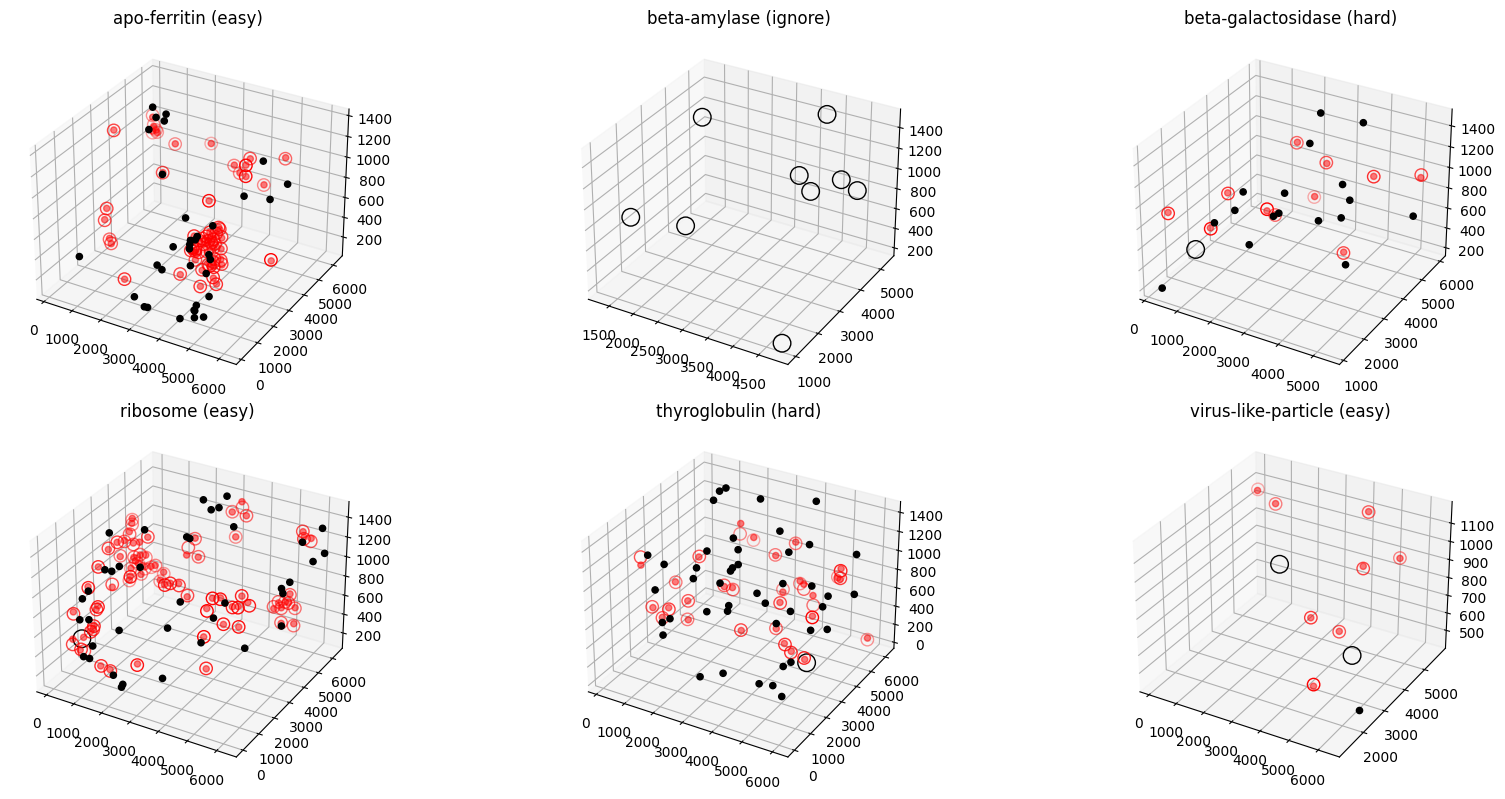

In [40]:
import os
if os.getenv('KAGGLE_IS_COMPETITION_RERUN'):
    MODE = 'submit'
else:
    MODE = 'local'







valid_dir ='/kaggle/input/czii-cryo-et-object-identification/train'
valid_id = ['TS_6_4', ]

def do_one_eval(truth, predict, threshold):
    P=len(predict)
    T=len(truth)

    if P==0:
        hit=[[],[]]
        miss=np.arange(T).tolist()
        fp=[]
        metric = [P,T,len(hit[0]),len(miss),len(fp)]
        return hit, fp, miss, metric

    if T==0:
        hit=[[],[]]
        fp=np.arange(P).tolist()
        miss=[]
        metric = [P,T,len(hit[0]),len(miss),len(fp)]
        return hit, fp, miss, metric

    #---
    distance = predict.reshape(P,1,3)-truth.reshape(1,T,3)
    distance = distance**2
    distance = distance.sum(axis=2)
    distance = np.sqrt(distance)
    p_index, t_index = linear_sum_assignment(distance)

    valid = distance[p_index, t_index] <= threshold
    p_index = p_index[valid]
    t_index = t_index[valid]
    hit = [p_index.tolist(), t_index.tolist()]
    miss = np.arange(T)
    miss = miss[~np.isin(miss,t_index)].tolist()
    fp = np.arange(P)
    fp = fp[~np.isin(fp,p_index)].tolist()

    metric = [P,T,len(hit[0]),len(miss),len(fp)] #for lb metric F-beta copmutation
    return hit, fp, miss, metric


def compute_lb(submit_df, overlay_dir):
    valid_id = valid_id = ['TS_6_4', ]
    print(valid_id)

    eval_df = []
    for id in valid_id:
        truth = read_one_truth(id, overlay_dir) #=f'{valid_dir}/overlay/ExperimentRuns')
        id_df = submit_df[submit_df['experiment'] == id]
        for p in PARTICLE:
            p = dotdict(p)
            print('\r', id, p.name, end='', flush=True)
            xyz_truth = truth[p.name]
            xyz_predict = id_df[id_df['particle_type'] == p.name][['x', 'y', 'z']].values
            hit, fp, miss, metric = do_one_eval(xyz_truth, xyz_predict, p.radius* 0.5)
            eval_df.append(dotdict(
                id=id, particle_type=p.name,
                P=metric[0], T=metric[1], hit=metric[2], miss=metric[3], fp=metric[4],
            ))
    print('')
    eval_df = pd.DataFrame(eval_df)
    gb = eval_df.groupby('particle_type').agg('sum').drop(columns=['id'])
    gb.loc[:, 'precision'] = gb['hit'] / gb['P']
    gb.loc[:, 'precision'] = gb['precision'].fillna(0)
    gb.loc[:, 'recall'] = gb['hit'] / gb['T']
    gb.loc[:, 'recall'] = gb['recall'].fillna(0)
    gb.loc[:, 'f-beta4'] = 17 * gb['precision'] * gb['recall'] / (16 * gb['precision'] + gb['recall'])
    gb.loc[:, 'f-beta4'] = gb['f-beta4'].fillna(0)

    gb = gb.sort_values('particle_type').reset_index(drop=False)
    # https://www.kaggle.com/competitions/czii-cryo-et-object-identification/discussion/544895
    gb.loc[:, 'weight'] = [1, 0, 2, 1, 2, 1]
    lb_score = (gb['f-beta4'] * gb['weight']).sum() / gb['weight'].sum()
    return gb, lb_score


#debug
if 1:
    if MODE=='local':
    #if 1:
        submit_df=pd.read_csv(
           'submission.csv'
            # '/kaggle/input/hengck-czii-cryo-et-weights-01/submission.csv'
        )
        gb, lb_score = compute_lb(submit_df, f'{valid_dir}/overlay/ExperimentRuns')
        print(gb)
        print('lb_score:',lb_score)
        print('')


        #show one ----------------------------------
        fig = plt.figure(figsize=(18, 8))

        id = valid_id[0]
        truth = read_one_truth(id,overlay_dir=f'{valid_dir}/overlay/ExperimentRuns')

        submit_df = submit_df[submit_df['experiment']==id]
        for p in PARTICLE:
            p = dotdict(p)
            xyz_truth = truth[p.name]
            xyz_predict = submit_df[submit_df['particle_type']==p.name][['x','y','z']].values
            hit, fp, miss, _ = do_one_eval(xyz_truth, xyz_predict, p.radius)
            print(id, p.name)
            print('\t num truth   :',len(xyz_truth) )
            print('\t num predict :',len(xyz_predict) )
            print('\t num hit  :',len(hit[0]) )
            print('\t num fp   :',len(fp) )
            print('\t num miss :',len(miss) )

            ax = fig.add_subplot(2, 3, p.label, projection='3d')
            if hit[0]:
                pt = xyz_predict[hit[0]]
                ax.scatter(pt[:, 0], pt[:, 1], pt[:, 2], alpha=0.5, color='r')
                pt = xyz_truth[hit[1]]
                ax.scatter(pt[:,0], pt[:,1], pt[:,2], s=80, facecolors='none', edgecolors='r')
            if fp:
                pt = xyz_predict[fp]
                ax.scatter(pt[:, 0], pt[:, 1], pt[:, 2], alpha=1, color='k')
            if miss:
                pt = xyz_truth[miss]
                ax.scatter(pt[:, 0], pt[:, 1], pt[:, 2], s=160, alpha=1, facecolors='none', edgecolors='k')

            ax.set_title(f'{p.name} ({p.difficulty})')

        plt.tight_layout()
        plt.show()
        
        #--- 
        zz=0

['TS_6_4', 'TS_69_2', 'TS_5_4']
 TS_5_4 virus-like-particle
         particle_type    P    T  hit  miss   fp  precision    recall  \
0         apo-ferritin  221  139  132     7   89   0.597285  0.949640   
1         beta-amylase    0   31    0    31    0   0.000000  0.000000   
2   beta-galactosidase   88   40   34     6   54   0.386364  0.850000   
3             ribosome  217  142  135     7   82   0.622120  0.950704   
4        thyroglobulin  242   94   86     8  156   0.355372  0.914894   
5  virus-like-particle   29   30   28     2    1   0.965517  0.933333   

    f-beta4  weight  
0  0.917791       1  
1  0.000000       0  
2  0.793956       2  
3  0.922057       1  
4  0.837342       2  
5  0.935167       1  
lb_score: 0.862516076908322

TS_6_4 apo-ferritin
	 num truth   : 58
	 num predict : 93
	 num hit  : 58
	 num fp   : 35
	 num miss : 0
TS_6_4 beta-amylase
	 num truth   : 9
	 num predict : 0
	 num hit  : 0
	 num fp   : 0
	 num miss : 9
TS_6_4 beta-galactosidase
	 num truth  

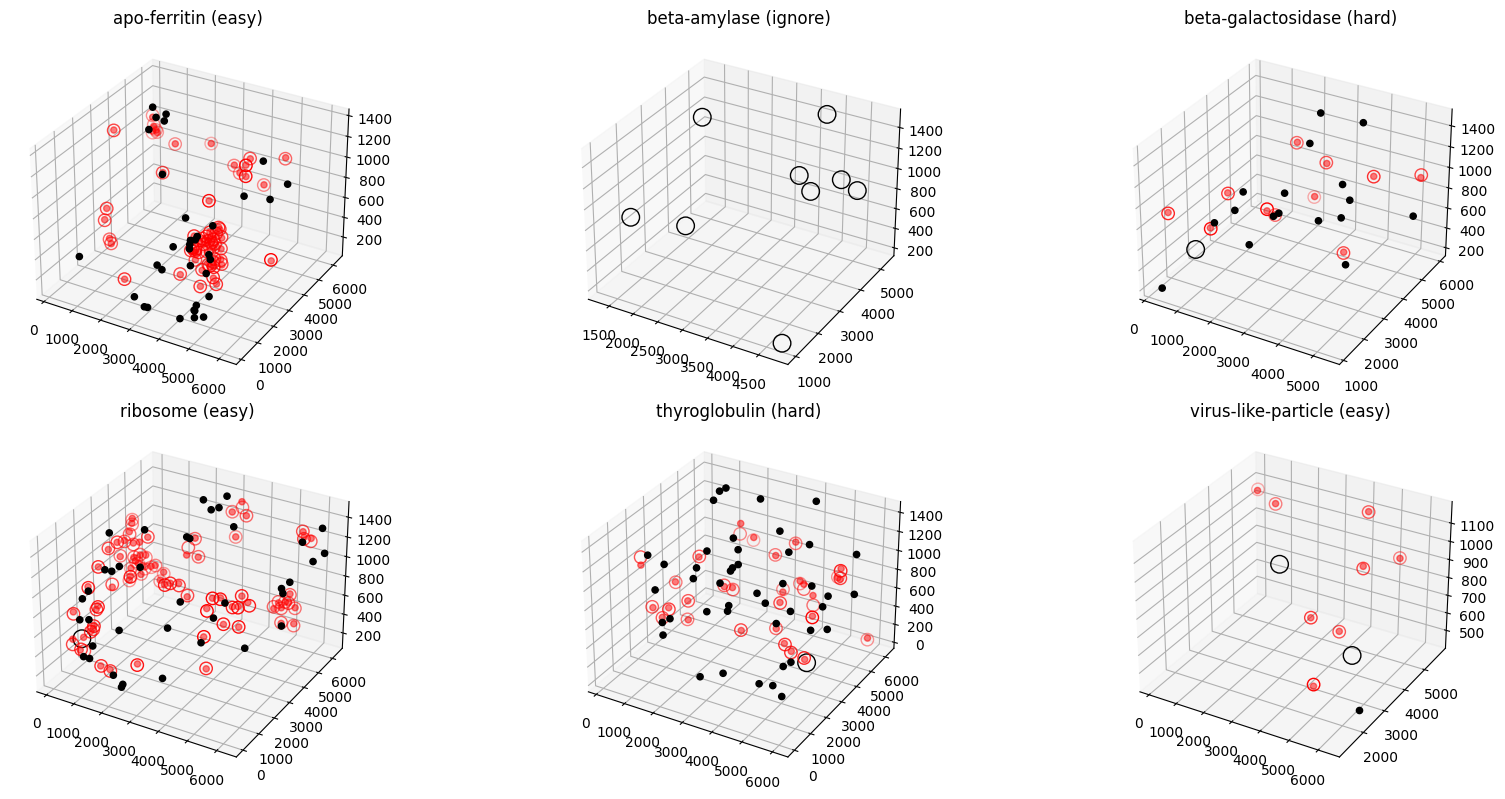

In [41]:
import os
if os.getenv('KAGGLE_IS_COMPETITION_RERUN'):
    MODE = 'submit'
else:
    MODE = 'local'







valid_dir ='/kaggle/input/czii-cryo-et-object-identification/train'
valid_id = ['TS_6_4', ]

def do_one_eval(truth, predict, threshold):
    P=len(predict)
    T=len(truth)

    if P==0:
        hit=[[],[]]
        miss=np.arange(T).tolist()
        fp=[]
        metric = [P,T,len(hit[0]),len(miss),len(fp)]
        return hit, fp, miss, metric

    if T==0:
        hit=[[],[]]
        fp=np.arange(P).tolist()
        miss=[]
        metric = [P,T,len(hit[0]),len(miss),len(fp)]
        return hit, fp, miss, metric

    #---
    distance = predict.reshape(P,1,3)-truth.reshape(1,T,3)
    distance = distance**2
    distance = distance.sum(axis=2)
    distance = np.sqrt(distance)
    p_index, t_index = linear_sum_assignment(distance)

    valid = distance[p_index, t_index] <= threshold
    p_index = p_index[valid]
    t_index = t_index[valid]
    hit = [p_index.tolist(), t_index.tolist()]
    miss = np.arange(T)
    miss = miss[~np.isin(miss,t_index)].tolist()
    fp = np.arange(P)
    fp = fp[~np.isin(fp,p_index)].tolist()

    metric = [P,T,len(hit[0]),len(miss),len(fp)] #for lb metric F-beta copmutation
    return hit, fp, miss, metric


def compute_lb(submit_df, overlay_dir):
    valid_id = list(submit_df["experiment"].unique())
    print(valid_id)

    eval_df = []
    for id in valid_id:
        truth = read_one_truth(id, overlay_dir) #=f'{valid_dir}/overlay/ExperimentRuns')
        id_df = submit_df[submit_df['experiment'] == id]
        for p in PARTICLE:
            p = dotdict(p)
            print('\r', id, p.name, end='', flush=True)
            xyz_truth = truth[p.name]
            xyz_predict = id_df[id_df['particle_type'] == p.name][['x', 'y', 'z']].values
            hit, fp, miss, metric = do_one_eval(xyz_truth, xyz_predict, p.radius* 0.5)
            eval_df.append(dotdict(
                id=id, particle_type=p.name,
                P=metric[0], T=metric[1], hit=metric[2], miss=metric[3], fp=metric[4],
            ))
    print('')
    eval_df = pd.DataFrame(eval_df)
    gb = eval_df.groupby('particle_type').agg('sum').drop(columns=['id'])
    gb.loc[:, 'precision'] = gb['hit'] / gb['P']
    gb.loc[:, 'precision'] = gb['precision'].fillna(0)
    gb.loc[:, 'recall'] = gb['hit'] / gb['T']
    gb.loc[:, 'recall'] = gb['recall'].fillna(0)
    gb.loc[:, 'f-beta4'] = 17 * gb['precision'] * gb['recall'] / (16 * gb['precision'] + gb['recall'])
    gb.loc[:, 'f-beta4'] = gb['f-beta4'].fillna(0)

    gb = gb.sort_values('particle_type').reset_index(drop=False)
    # https://www.kaggle.com/competitions/czii-cryo-et-object-identification/discussion/544895
    gb.loc[:, 'weight'] = [1, 0, 2, 1, 2, 1]
    lb_score = (gb['f-beta4'] * gb['weight']).sum() / gb['weight'].sum()
    return gb, lb_score


#debug
if 1:
    if MODE=='local':
    #if 1:
        submit_df=pd.read_csv(
           'submission.csv'
            # '/kaggle/input/hengck-czii-cryo-et-weights-01/submission.csv'
        )
        gb, lb_score = compute_lb(submit_df, f'{valid_dir}/overlay/ExperimentRuns')
        print(gb)
        print('lb_score:',lb_score)
        print('')


        #show one ----------------------------------
        fig = plt.figure(figsize=(18, 8))

        id = valid_id[0]
        truth = read_one_truth(id,overlay_dir=f'{valid_dir}/overlay/ExperimentRuns')

        submit_df = submit_df[submit_df['experiment']==id]
        for p in PARTICLE:
            p = dotdict(p)
            xyz_truth = truth[p.name]
            xyz_predict = submit_df[submit_df['particle_type']==p.name][['x','y','z']].values
            hit, fp, miss, _ = do_one_eval(xyz_truth, xyz_predict, p.radius)
            print(id, p.name)
            print('\t num truth   :',len(xyz_truth) )
            print('\t num predict :',len(xyz_predict) )
            print('\t num hit  :',len(hit[0]) )
            print('\t num fp   :',len(fp) )
            print('\t num miss :',len(miss) )

            ax = fig.add_subplot(2, 3, p.label, projection='3d')
            if hit[0]:
                pt = xyz_predict[hit[0]]
                ax.scatter(pt[:, 0], pt[:, 1], pt[:, 2], alpha=0.5, color='r')
                pt = xyz_truth[hit[1]]
                ax.scatter(pt[:,0], pt[:,1], pt[:,2], s=80, facecolors='none', edgecolors='r')
            if fp:
                pt = xyz_predict[fp]
                ax.scatter(pt[:, 0], pt[:, 1], pt[:, 2], alpha=1, color='k')
            if miss:
                pt = xyz_truth[miss]
                ax.scatter(pt[:, 0], pt[:, 1], pt[:, 2], s=160, alpha=1, facecolors='none', edgecolors='k')

            ax.set_title(f'{p.name} ({p.difficulty})')

        plt.tight_layout()
        plt.show()
        
        #--- 
        zz=0